In [1]:
%load_ext autoreload
%autoreload 2

import os,sys,uproot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy.special import logit
from array import array
from math import floor, log10
import decay_widths as dw

import Create_collie_inputs_slimmed as Aditya_funcs

print ('Success')

### Some root paths used by different users/devices
#     root_dir = "../../For_David/" for the default root directory used by David
#     root_dir = "/exp/uboone/data/users/jbateman/workdir/HPS_uboone_analysis/" # Filepath used on the FNAL cluster.
#     root_dir = "/Users/user/PhD/HPS_uboone_analysis/" # A filepath used for local running.
root_dir = "/Users/user/PhD/HPS_uboone_analysis/"
root_dir_fix = root_dir

Success


# Purpose of script

This script loads the signal files for a single mass point, and plots the angle of the incoming scalar relative to the MicroBooNE detector axis.

In [2]:
def New_loader(Run, mass, nshr, KDIF_KDAR_str, bool_full_sample=True, get_tof=False, for_david=True, testing_new_flux = False, update_KDAR_scaling = False):
    """
    New function to load the .pkl files as dataframes. Mostly taken directly from Aditya's code.
    get_tof is a boolean that determines whether to load the time of flight values from the root file.
    """
    #Constants for normalisation factors
    OnBeam_tortgt_wcut_fhc = 2.002e20
    OnBeam_tortgt_wcut_rhc = 5.009e20

    if Run == 'Run1':
        OnBeam_tortgt_wcut = OnBeam_tortgt_wcut_fhc
    elif Run == 'Run3':

        OnBeam_tortgt_wcut = OnBeam_tortgt_wcut_rhc
    
    main_input_dir = root_dir+"/BDT_inputs_pkl/"
    

    #### SIG ####
    if bool_full_sample == True: print ('No signal')
    else:
        df_sig = pd.read_pickle(main_input_dir+'AllVar_Selected_'+Run+'_NuMI_Signal_'+KDIF_KDAR_str+'_'+mass+'_'+nshr+'_PPFX_pred_NEW.pkl')
        frac_sig_test_sample = len(df_sig.query('is_trained == 0'))/len(df_sig)
        df_sig['frac_test_sample'] = frac_sig_test_sample #Should be 0.4
        df_sig = df_sig.query('is_trained==0') #Only taking testing events!
        
        if update_KDAR_scaling:
            print('Updating KDAR scaling for signal')

            if Run == 'Run1':
                df_sig['KDAR_scale'] = df_sig['KDAR_scale'].astype(float)
                df_sig.loc[df_sig['KDAR_scale'] == 8.0, 'KDAR_scale'] = 0.085/0.016
            elif Run == 'Run3':
                df_sig.loc[df_sig['KDAR_scale'] == 8.6, 'KDAR_scale'] = 0.085/0.016

            
        df_sig.eval('scale_factor_ls = (1/frac_test_sample)*KDAR_scale*'+str(OnBeam_tortgt_wcut)+'/test_sample_POT_ls',inplace=True)

    
    if bool_full_sample == True: print ('NO LOGIT FOR SIGNAL..')
    else: df_sig['logit_pred'] = logit(df_sig['pred'])


    print (f'SUCCESSFULLY LOADED THE PICKLE FILES {Run, mass, nshr, KDIF_KDAR_str}')
    
    return df_sig

In [17]:
Run = '1'
HPS_mass = 150
shr = '1shr'
K = 'KDIF'

sig_dict = {}

for run in ['1', '3']:
    for K in ['KDIF', 'KDAR']:
        for shr in ['1shr', '2shr']:
            df_sig = New_loader('Run'+run, str(HPS_mass), shr, K, bool_full_sample=False, get_tof=False, for_david=False, testing_new_flux=False, update_KDAR_scaling=True)
            sig_dict['signal_run_'+run+'_'+str(HPS_mass)+'_'+shr+'_'+K] = df_sig

loaded_run = Run

Updating KDAR scaling for signal
SUCCESSFULLY LOADED THE PICKLE FILES ('Run1', '150', '1shr', 'KDIF')
Updating KDAR scaling for signal
SUCCESSFULLY LOADED THE PICKLE FILES ('Run1', '150', '2shr', 'KDIF')


/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_58492/3612114207.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sig['KDAR_scale'] = df_sig['KDAR_scale'].astype(float)
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_58492/3612114207.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sig['KDAR_scale'] = df_sig['KDAR_scale'].astype(float)


Updating KDAR scaling for signal
SUCCESSFULLY LOADED THE PICKLE FILES ('Run1', '150', '1shr', 'KDAR')
Updating KDAR scaling for signal
SUCCESSFULLY LOADED THE PICKLE FILES ('Run1', '150', '2shr', 'KDAR')
Updating KDAR scaling for signal
SUCCESSFULLY LOADED THE PICKLE FILES ('Run3', '150', '1shr', 'KDIF')
Updating KDAR scaling for signal
SUCCESSFULLY LOADED THE PICKLE FILES ('Run3', '150', '2shr', 'KDIF')


/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_58492/3612114207.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sig['KDAR_scale'] = df_sig['KDAR_scale'].astype(float)
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_58492/3612114207.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sig['KDAR_scale'] = df_sig['KDAR_scale'].astype(float)
/var/folders/wr/yb1fjkjn1mbg644j5v7f2tlm0000gp/T/ipykernel_58492/3612114207.py:34: FutureWarning: Setting an item of incompatible dtype is

Updating KDAR scaling for signal
SUCCESSFULLY LOADED THE PICKLE FILES ('Run3', '150', '1shr', 'KDAR')
Updating KDAR scaling for signal
SUCCESSFULLY LOADED THE PICKLE FILES ('Run3', '150', '2shr', 'KDAR')


In [18]:
sig_dict.keys()

dict_keys(['signal_run_1_150_1shr_KDIF', 'signal_run_1_150_2shr_KDIF', 'signal_run_1_150_1shr_KDAR', 'signal_run_1_150_2shr_KDAR', 'signal_run_3_150_1shr_KDIF', 'signal_run_3_150_2shr_KDIF', 'signal_run_3_150_1shr_KDAR', 'signal_run_3_150_2shr_KDAR'])

In [19]:
#These are the nominal values of theta, taken directly from Aditya's thesis as the "KOTO CV"
#We initialise them so that the signal theta values can be plotted in the input variable plots

theta_text_dict = {'100':5.36e-4, '125':5.5e-4, '130':5.54e-4, '135':5.58e-4, '140':5.63e-4, '145':5.68e-4, '150':5.73e-4, '200':6.58e-4} #Taken directly from Aditya's thesis

theta_dict={'100_1shr_KDIF': 0.000536, '100_1shr_KDAR': 0.000536, '100_2shr_KDIF': 0.000536, '100_2shr_KDAR': 0.000536, 
            '125_1shr_KDIF': 0.00055, '125_1shr_KDAR': 0.00055, '125_2shr_KDIF': 0.00055, '125_2shr_KDAR': 0.00055, 
            '130_1shr_KDIF': 0.000554, '130_1shr_KDAR': 0.000554, '130_2shr_KDIF': 0.000554, '130_2shr_KDAR': 0.000554, 
            '135_1shr_KDIF': 0.000558, '135_1shr_KDAR': 0.000558, '135_2shr_KDIF': 0.000558, '135_2shr_KDAR': 0.000558, 
            '140_1shr_KDIF': 0.000563, '140_1shr_KDAR': 0.000563, '140_2shr_KDIF': 0.000563, '140_2shr_KDAR': 0.000563, 
            '145_1shr_KDIF': 0.000568, '145_1shr_KDAR': 0.000568, '145_2shr_KDIF': 0.000568, '145_2shr_KDAR': 0.000568, 
            '150_1shr_KDIF': 0.000573, '150_1shr_KDAR': 0.000573, '150_2shr_KDIF': 0.000573, '150_2shr_KDAR': 0.000573, 
            '200_1shr_KDIF': 0.000658, '200_1shr_KDAR': 0.000658, '200_2shr_KDIF': 0.000658, '200_2shr_KDAR': 0.000658}


# Original values of c_phi, used for the axion reweighting. 
c_phi_text_dict = {'100':0.0027014149387605906, '125':0.0018106609327994778, '130':0.0009990304425688081, '135':4.52690931768051e-06, '140':0.0008568518547569688, '145':0.0014326989318147938, '150':0.001798938228520414, '200':0.002864767955135017}  
c_phi_dict={'100_1shr_KDIF': 0.0027014149387605906, '100_1shr_KDAR': 0.0027014149387605906, '100_2shr_KDIF': 0.0027014149387605906, '100_2shr_KDAR': 0.0027014149387605906, 
            '125_1shr_KDIF': 0.0018106609327994778, '125_1shr_KDAR': 0.0018106609327994778, '125_2shr_KDIF': 0.0018106609327994778, '125_2shr_KDAR': 0.0018106609327994778, 
            '130_1shr_KDIF': 0.0009990304425688081, '130_1shr_KDAR': 0.0009990304425688081, '130_2shr_KDIF': 0.0009990304425688081, '130_2shr_KDAR': 0.0009990304425688081, 
            '135_1shr_KDIF': 4.52690931768051e-06, '135_1shr_KDAR': 4.52690931768051e-06, '135_2shr_KDIF': 4.52690931768051e-06, '135_2shr_KDAR': 4.52690931768051e-06, 
            '140_1shr_KDIF': 0.0008568518547569688, '140_1shr_KDAR': 0.0008568518547569688, '140_2shr_KDIF': 0.0008568518547569688, '140_2shr_KDAR': 0.0008568518547569688, 
            '145_1shr_KDIF': 0.0014326989318147938, '145_1shr_KDAR': 0.0014326989318147938, '145_2shr_KDIF': 0.0014326989318147938, '145_2shr_KDAR': 0.0014326989318147938, 
            '150_1shr_KDIF': 0.001798938228520414, '150_1shr_KDAR': 0.001798938228520414, '150_2shr_KDIF': 0.001798938228520414, '150_2shr_KDAR': 0.001798938228520414, 
            '200_1shr_KDIF': 0.002864767955135017, '200_1shr_KDAR': 0.002864767955135017, '200_2shr_KDIF': 0.002864767955135017, '200_2shr_KDAR': 0.002864767955135017}

print("Default thetas are:")
print(theta_dict)
print()

#Calculating the scalings for the signal histograms required to get the limits Aditya originally quoted. 
theta_scaling, hist_scaling = {}, {}
limit_theta_power_1 = {}
paper_limits = {100:3.08e-4, 125:2.93e-4, 130:2.94e-4, 135:3.21e-4, 140:2.79e-4, 145:2.47e-4, 150:2.9e-4, 200:2.31e-4} #Limits given by Aditya
for HNL_mass in theta_dict:
    mass_label=int(HNL_mass.split("_")[0])
    theta_scaling[HNL_mass] = paper_limits[mass_label]/(theta_dict[HNL_mass])
    hist_scaling[HNL_mass] = theta_scaling[HNL_mass]**(2)
    
print("Scalings for theta values are: ")
print(theta_scaling)
print(hist_scaling)

print("Original signal scalings:")
print(hist_scaling)
print()
visibility_scaling = 100.0
new_hist_scaling = {}
for HNL_mass in theta_dict:
    new_hist_scaling[HNL_mass] = hist_scaling[HNL_mass]*visibility_scaling
print("Signal scalings for plots:")
print(new_hist_scaling)

Default thetas are:
{'100_1shr_KDIF': 0.000536, '100_1shr_KDAR': 0.000536, '100_2shr_KDIF': 0.000536, '100_2shr_KDAR': 0.000536, '125_1shr_KDIF': 0.00055, '125_1shr_KDAR': 0.00055, '125_2shr_KDIF': 0.00055, '125_2shr_KDAR': 0.00055, '130_1shr_KDIF': 0.000554, '130_1shr_KDAR': 0.000554, '130_2shr_KDIF': 0.000554, '130_2shr_KDAR': 0.000554, '135_1shr_KDIF': 0.000558, '135_1shr_KDAR': 0.000558, '135_2shr_KDIF': 0.000558, '135_2shr_KDAR': 0.000558, '140_1shr_KDIF': 0.000563, '140_1shr_KDAR': 0.000563, '140_2shr_KDIF': 0.000563, '140_2shr_KDAR': 0.000563, '145_1shr_KDIF': 0.000568, '145_1shr_KDAR': 0.000568, '145_2shr_KDIF': 0.000568, '145_2shr_KDAR': 0.000568, '150_1shr_KDIF': 0.000573, '150_1shr_KDAR': 0.000573, '150_2shr_KDIF': 0.000573, '150_2shr_KDAR': 0.000573, '200_1shr_KDIF': 0.000658, '200_1shr_KDAR': 0.000658, '200_2shr_KDIF': 0.000658, '200_2shr_KDAR': 0.000658}

Scalings for theta values are: 
{'100_1shr_KDIF': 0.5746268656716418, '100_1shr_KDAR': 0.5746268656716418, '100_2shr_K

In [20]:
def calc_angle(sample, mass, run = 1, vec = [0,0,1]):
    theta = sample['shr_theta_ls']
    run = int(run)
    if run == 1:
        OnBeam_tortgt_wcut = 2.002e20
        root_string = 'Final_v51_FHC/sfn_numi_fhc_generic'
    elif run == 3:
        OnBeam_tortgt_wcut = 1.6e20
        root_string = 'Final_v51_FHC/sfn_numi_rhc_generic'
    else:
        print("Invalid run number")

    shr = "1shr"
    K = "KDIF"
    root_file = uproot.open(root_dir+root_string+f"_{mass}_ppfx_CV_train.root")['nuselection']
    root_keys = root_file['NeutrinoSelectionFilter;1'].keys()

    indices = dw.match_RSE_indices(sample, root_file)

    theta = root_file['NeutrinoSelectionFilter;1']['shr_theta'].array()[indices]


    if len(theta)>0:
        

        shr_px = root_file['NeutrinoSelectionFilter;1']['mc_px'].array()[indices]
        shr_py = root_file['NeutrinoSelectionFilter;1']['mc_py'].array()[indices]
        shr_pz = root_file['NeutrinoSelectionFilter;1']['mc_pz'].array()[indices]

        
        shr_px = shr_px[:,0] + shr_px[:,1]
        shr_py = shr_py[:,0] + shr_py[:,1]
        shr_pz = shr_pz[:,0] + shr_pz[:,1]

        p_vec = np.array([shr_px,shr_py,shr_pz]).T
    
        p_vec = p_vec/np.linalg.norm(p_vec,axis=1)[:,None]
        

        bnb_vector = np.array(vec)
        bnb_vector_arr = np.tile(bnb_vector, (len(p_vec),1))


        cos_theta = np.einsum('ij,ij->i', p_vec, bnb_vector_arr) 
        theta = np.arccos(cos_theta)

        angle = np.rad2deg(theta)
    else:
        angle =  []
    return angle

def Plot_kdif_kdar_fracs_root(sample_endname, samples=[], thetas={}, run = loaded_run,
                                    scale_up=new_hist_scaling, HNL_mass = 0, colours_sample={}, order=[], plot_KDIF_KDAR=True):
    """
    This function takes the input samples, the signal scalings and plots the variable given in the first argument. 
    There are probably many unnecessary arguemnts but I've kept them in case extra customization is reqiured.
    """
    if(samples==[]): raise Exception("Specify samples dict") 
    if(colours_sample=={}): colours_sample = {'overlay':'#0254cf','dirtoverlay':'cornflowerblue','beamoff':'limegreen',
                                              'signal':'red','signal_extra':'gold'}
    if(order==[]): order = ["beamoff","overlay","dirtoverlay"] #From bottom to top in stack
    if(plot_KDIF_KDAR): print("Plotting both KDIF and KDAR signal samples.")
    
    mass_str = sample_endname.split("_")[0]
    mass = int(mass_str)
    shr_str = sample_endname.split("_")[1]
    nshr_label = shr_str[0]
    K_str = sample_endname.split("_")[2]
    if K_str=="KDIF": extra_K_str = "KDAR" #This is so both KDAR and KDIF are on the same plot
    if K_str=="KDAR": extra_K_str = "KDIF"

    print("Number of showers: " + str(nshr_label))
   
    theta = thetas[HNL_mass]
    theta_2 = theta**2
    new_theta = np.sqrt(scale_up[HNL_mass])*theta
    theta = new_theta

    signal=samples[f"signal_run_{run}_{sample_endname}"]    
    signal_extra = samples[f"signal_run_{run}_{mass_str}_{shr_str}_{extra_K_str}"]

    weight_signal = samples[f"signal_run_{run}_{sample_endname}"]['scale_factor_ls']*scale_up[sample_endname]
    weight_signal_extra = samples[f"signal_run_{run}_{mass_str}_{shr_str}_{extra_K_str}"]['scale_factor_ls']*scale_up[f"{mass_str}_{shr_str}_{extra_K_str}"]

    signal_angle = calc_angle(signal, mass=mass_str, run=run)
    signal_extra_angle = calc_angle(signal_extra, mass=mass_str,  run=run)

    # angle_dict = {
    #     'signal':signal_angle,
    #     'signal_weights':weight_signal,
    #     'signal_extra':signal_extra_angle,
    #     'signal_extra_weights':weight_signal_extra
    # }
    angle_dict = {
        'signal':signal_angle,
        'signal_weights':weight_signal,
        'signal_extra':signal_extra_angle,
        'signal_extra_weights':weight_signal_extra
    }
    return angle_dict

In [21]:
# sample_endname, samples=[], thetas={}, run = loaded_run,
# scale_up=new_hist_scaling, HNL_mass = 0, colours_sample={}, order=[], plot_KDIF_KDAR=True

In [22]:
variable = 'shr_pz_v_ls'
Run = loaded_run
mass = str(HPS_mass)
shrs = '1shr'
HNL_mass = str(mass) + '_' +  shrs+ '_'+'KDIF'
sample_endname = f'{HNL_mass}' #_1shr_KDIF'


ones_weights = False # To remove weights

print(f"Plotting Run {Run}")

plot_KDIF_KDAR=True
reweight = False 

#Set legsize=None to not show legend!
angle_dict_1shr_run1 = Plot_kdif_kdar_fracs_root(sample_endname, sig_dict,
                                HNL_mass=sample_endname, run = '1', thetas=theta_dict,scale_up=new_hist_scaling,
                                plot_KDIF_KDAR=plot_KDIF_KDAR, )

shrs = '2shr'
HNL_mass = mass + '_' +  shrs+ '_'+'KDIF'
sample_endname = f'{HNL_mass}' #_1shr_KDIF'
 
angle_dict_2shr_run1 = Plot_kdif_kdar_fracs_root(sample_endname, sig_dict,
                                HNL_mass=sample_endname, run = '1', thetas=theta_dict,scale_up=new_hist_scaling,
                                plot_KDIF_KDAR=plot_KDIF_KDAR, )

#Set legsize=None to not show legend!
angle_dict_1shr_run3 = Plot_kdif_kdar_fracs_root(sample_endname, sig_dict,
                                HNL_mass=sample_endname, run = '3', thetas=theta_dict,scale_up=new_hist_scaling,
                                plot_KDIF_KDAR=plot_KDIF_KDAR, )

shrs = '2shr'
HNL_mass = mass + '_' +  shrs+ '_'+'KDIF'
sample_endname = f'{HNL_mass}' #_1shr_KDIF'
 
angle_dict_2shr_run3 = Plot_kdif_kdar_fracs_root(sample_endname, sig_dict,
                                HNL_mass=sample_endname, run = '3', thetas=theta_dict,scale_up=new_hist_scaling,
                                plot_KDIF_KDAR=plot_KDIF_KDAR, )

angles_kdif_run1 = np.append(angle_dict_1shr_run1['signal'],angle_dict_2shr_run1['signal'])
angles_kdar_run1 = np.append(angle_dict_1shr_run1['signal_extra'],angle_dict_2shr_run1['signal_extra'])

weights_kdif_run1 = np.append(angle_dict_1shr_run1['signal_weights'],angle_dict_2shr_run1['signal_weights'])
weights_kdar_run1 = np.append(angle_dict_1shr_run1['signal_extra_weights'],angle_dict_2shr_run1['signal_extra_weights'])

angles_tot_run1 = np.append(angles_kdif_run1,angles_kdar_run1)
weights_tot_run1 = np.append(weights_kdif_run1,weights_kdar_run1)

angle_kdir_run3 = np.append(angle_dict_1shr_run3['signal'],angle_dict_2shr_run3['signal'])
angle_kdar_run3 = np.append(angle_dict_1shr_run3['signal_extra'],angle_dict_2shr_run3['signal_extra'])

weights_kdif_run3 = np.append(angle_dict_1shr_run3['signal_weights'],angle_dict_2shr_run3['signal_weights'])
weights_kdar_run3 = np.append(angle_dict_1shr_run3['signal_extra_weights'],angle_dict_2shr_run3['signal_extra_weights'])

angles_tot_run3 = np.append(angle_kdir_run3,angle_kdar_run3)
weights_tot_run3 = np.append(weights_kdif_run3,weights_kdar_run3)

angles_tot = np.append(angles_tot_run1,angles_tot_run3)
weights_tot = np.append(weights_tot_run1,weights_tot_run3)

angles_kdar = np.append(angles_kdar_run1,angle_kdar_run3)
weights_kdar = np.append(weights_kdar_run1,weights_kdar_run3)

angles_kdif = np.append(angles_kdif_run1,angle_kdir_run3)
weights_kdif = np.append(weights_kdif_run1,weights_kdif_run3)


Plotting Run 1
Plotting both KDIF and KDAR signal samples.
Number of showers: 1
Plotting both KDIF and KDAR signal samples.
Number of showers: 2
Plotting both KDIF and KDAR signal samples.
Number of showers: 2
Plotting both KDIF and KDAR signal samples.
Number of showers: 2


saved
With names like KDIF_KDAR_angle_150_MeV_combined_runs1_scalar_alt.png


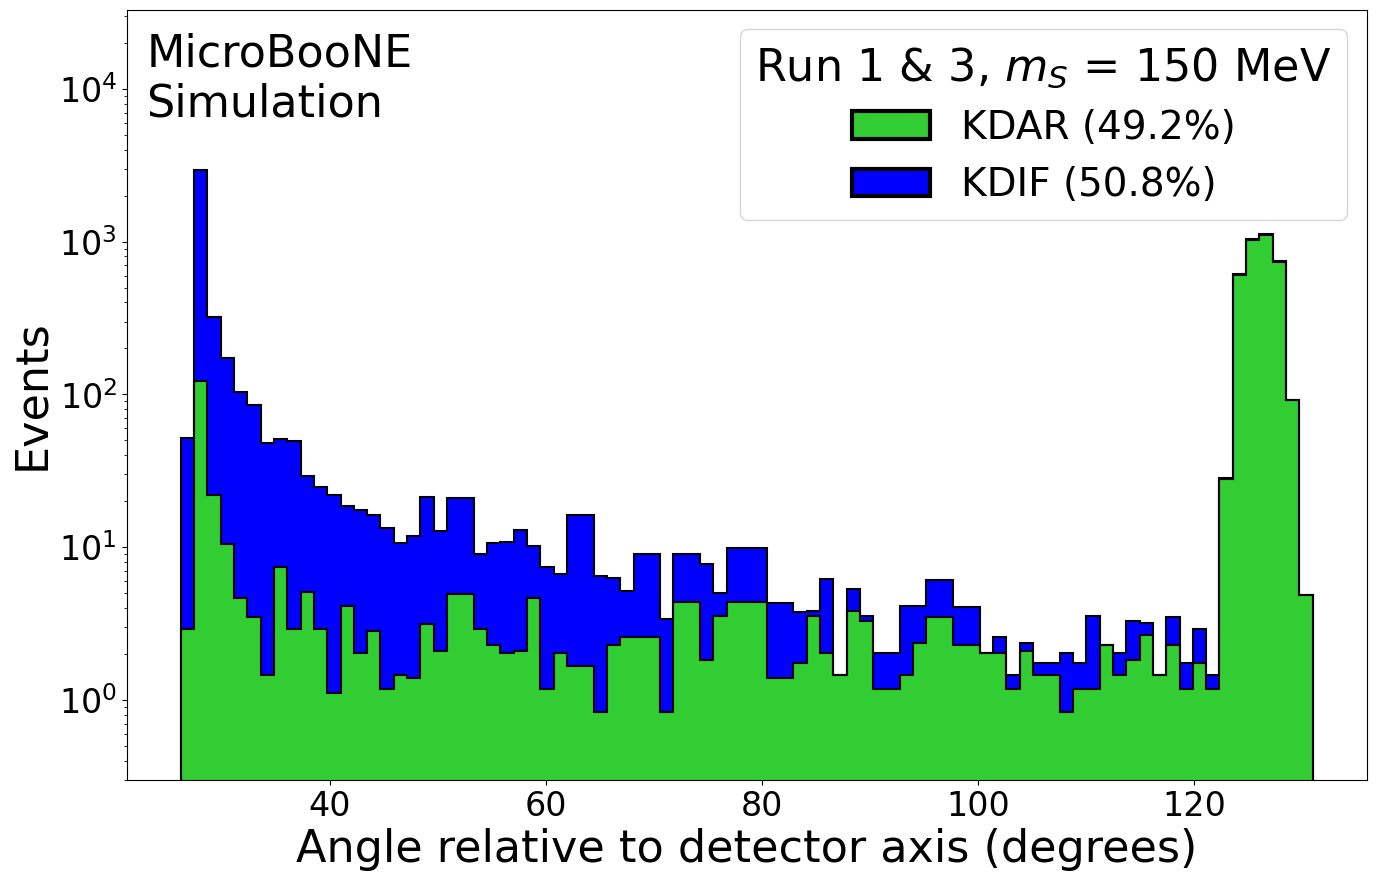

In [23]:
min_ang, max_ang = 20, 131
alt = True
test_hist = np.histogram(angles_tot, bins=100, weights=weights_tot)

if ones_weights:
    weights_kdif = np.ones_like(weights_kdif)
    weights_kdar = np.ones_like(weights_kdar)
    weights_tot = np.ones_like(weights_tot)

num_kdif = np.sum(weights_kdif)
num_kdar = np.sum(weights_kdar)
num_tot = np.sum(weights_tot)
bins = np.linspace(min_ang,max_ang,max_ang-min_ang-20)

min_count =  1
test_hist, bin_edges = np.histogram(angles_kdar, bins=bins, weights=weights_kdar)


bin_edges_final = bin_edges
bin_centers_final = (bin_edges_final[:-1] + bin_edges_final[1:])/2

hist_final = []
bin_edges_final = []
temp_count = 0
for i, count in enumerate(test_hist):
    temp_count += count
    if temp_count < min_count:
        None    
    else:
        hist_final.append(temp_count)
        bin_edges_final.append(bin_edges[i])
        temp_count = 0

bin_edges_final.append(bin_edges[-1])
bin_edges_final = np.array(bin_edges_final)
bin_centers_final = (bin_edges_final[:-1] + bin_edges_final[1:])/2
bins = bin_edges_final

plt.figure(figsize=(16,10), dpi=100)   
# plt.hist(angles_kdif, bins=bins, weights=weights_kdif, histtype='step', label='KDIF ({:.3}%)'.format(100*num_kdif/(num_kdif+num_kdar)), color='blue')
# plt.hist(angles_kdar, bins=bins, weights=weights_kdar, histtype='step', label='KDAR ({:.3}%)'.format(100*num_kdar/(num_kdif+num_kdar)), color='red')
# plt.hist(angles_tot, bins=bins, weights=weights_tot, histtype='step', label='Total', color='black')

hist_kdar, bin_edges = np.histogram(angles_kdar, bins=bins, weights=weights_kdar)
hist_kdif, bin_edges = np.histogram(angles_kdif, bins=bins, weights=weights_kdif)
hist_tot, bin_edges = np.histogram(angles_tot, bins=bins, weights=weights_tot)

if alt == True:
    c1 = 'limegreen'
    c2 = 'blue'
    alpha = 1
else:
    c1 = 'gold'
    c2 = 'red'
    alpha = 0.5
plt.bar(bin_centers_final, hist_kdar, width=np.diff(bin_edges_final), color=c1,alpha=alpha)
plt.hist(angles_kdar, bins=bins, weights=weights_kdar, histtype='step', linewidth=1.5, color='black')
plt.bar(bin_centers_final, hist_kdif, width=np.diff(bin_edges_final), bottom=hist_kdar, color=c2,alpha=alpha)
plt.hist(angles_tot, bins=bins, weights=weights_tot, histtype='step', linewidth=1.5, color='black')

plt.bar(-1,-1, label='KDAR ({:.3}%)'.format(100*num_kdar/(num_kdif+num_kdar)), color=c1, linewidth=3, alpha=alpha,edgecolor='black')
plt.bar(-1,-1, label='KDIF ({:.3}%)'.format(100*num_kdif/(num_kdif+num_kdar)), color=c2, linewidth=3, alpha=alpha,edgecolor='black')

plt.yscale('log')
plt.xlabel(r'Angle relative to detector axis (degrees)',fontsize=32)
plt.ylabel('Events',fontsize=32)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

max_height = 7.5*np.max(hist_tot)


plt.text(1.15*min_ang, max_height*0.3,"MicroBooNE\nSimulation",fontsize=32)

min_ang = np.min(bin_edges_final)
max_ang = np.max(bin_edges_final)
plt.xlim(min_ang-5,max_ang+5)
plt.ylim(0.3,1.5*max_height)


if reweight:
    plt.legend(loc='upper right',title = rf'Run 1 & 3, $m_a$ = {mass} MeV', title_fontsize=32, fontsize=28)
    ext = 'alp'
else:
    plt.legend(loc='upper right',title = rf'Run 1 & 3, $m_S$ = {mass} MeV', title_fontsize=32, fontsize=28)
    ext = 'scalar'
save_figures = input("Do you want to save this figure? y/n ")

if alt == True:
    ext+='_alt'

if save_figures == "y":
    plt.savefig(root_dir+f"Plots/BDT_input/KDIF_KDAR_angle_{mass}_MeV_combined_runs" + Run + "_" + ext + ".pdf", dpi=100)
    plt.savefig(root_dir+f"Plots/BDT_input/KDIF_KDAR_angle_{mass}_MeV_combined_runs" + Run + "_" + ext  + ".png", dpi=100)
    print("saved")
    print("With names like " + f"KDIF_KDAR_angle_{mass}_MeV_combined_runs" + Run + "_" + ext + ".png")


# plt.show()